In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os


In [2]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"feruzr","key":"6157410151343509e8fdc3e8c6bd5272"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install kaggle
!kaggle datasets download -d rashikrahmanpritom/plant-disease-recognition-dataset
!unzip plant-disease-recognition-dataset.zip -d new_plant_dataset



Dataset URL: https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset
License(s): CC0-1.0
100% 1.24G/1.25G [00:11<00:00, 115MB/s] 
100% 1.25G/1.25G [00:11<00:00, 114MB/s]
Archive:  plant-disease-recognition-dataset.zip
  inflating: new_plant_dataset/Test/Test/Healthy/8ddaa5a5caa5caa8.jpg  
  inflating: new_plant_dataset/Test/Test/Healthy/8ddaac1bd6c8cd0a.jpg  
  inflating: new_plant_dataset/Test/Test/Healthy/8ddd5ec1c0de38c4.jpg  
  inflating: new_plant_dataset/Test/Test/Healthy/8def3f60308ab41b.jpg  
  inflating: new_plant_dataset/Test/Test/Healthy/8def4d91382175c3.jpg  
  inflating: new_plant_dataset/Test/Test/Healthy/8df452e2e38c0b6e.jpg  
  inflating: new_plant_dataset/Test/Test/Healthy/8dfae9d78cc32089.jpg  
  inflating: new_plant_dataset/Test/Test/Healthy/8e3dbccdfe08c850.jpg  
  inflating: new_plant_dataset/Test/Test/Healthy/8e68163c62dc57d5.jpg  
  inflating: new_plant_dataset/Test/Test/Healthy/8e6a823cce9ff40c.jpg  
  inflating: new_plant_dataset/Te

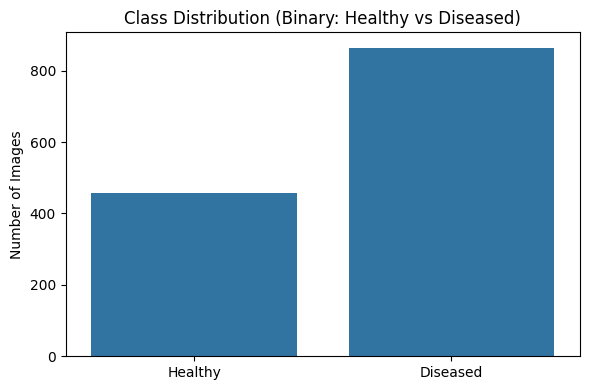

In [5]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to the original class folders
root_dir = "./new_plant_dataset/Train/Train"
healthy_dir = os.path.join(root_dir, "Healthy")
powdery_dir = os.path.join(root_dir, "Powdery")
rust_dir = os.path.join(root_dir, "Rust")

# Count files
healthy_count = len(os.listdir(healthy_dir))
diseased_count = len(os.listdir(powdery_dir)) + len(os.listdir(rust_dir))

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=["Healthy", "Diseased"], y=[healthy_count, diseased_count])
plt.title("Class Distribution (Binary: Healthy vs Diseased)")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()


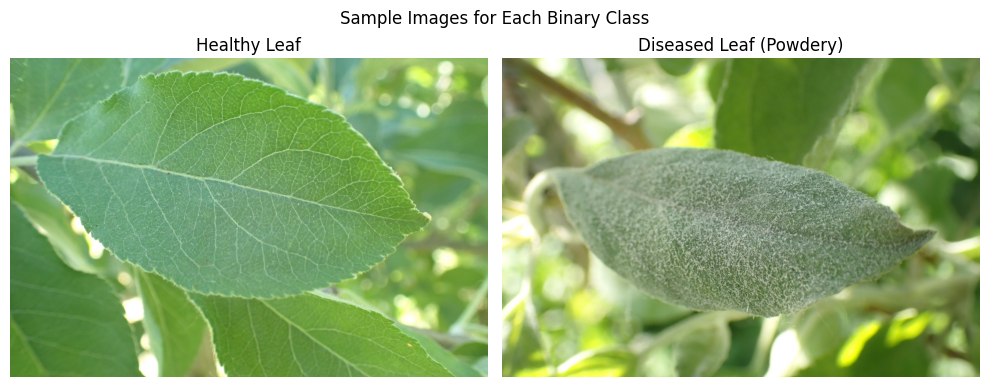

In [6]:
from PIL import Image

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Healthy sample
healthy_sample_path = os.path.join(healthy_dir, os.listdir(healthy_dir)[0])
axs[0].imshow(Image.open(healthy_sample_path))
axs[0].set_title("Healthy Leaf")
axs[0].axis('off')

# Diseased sample
diseased_sample_path = os.path.join(powdery_dir, os.listdir(powdery_dir)[0])
axs[1].imshow(Image.open(diseased_sample_path))
axs[1].set_title("Diseased Leaf (Powdery)")
axs[1].axis('off')

plt.suptitle("Sample Images for Each Binary Class")
plt.tight_layout()
plt.show()


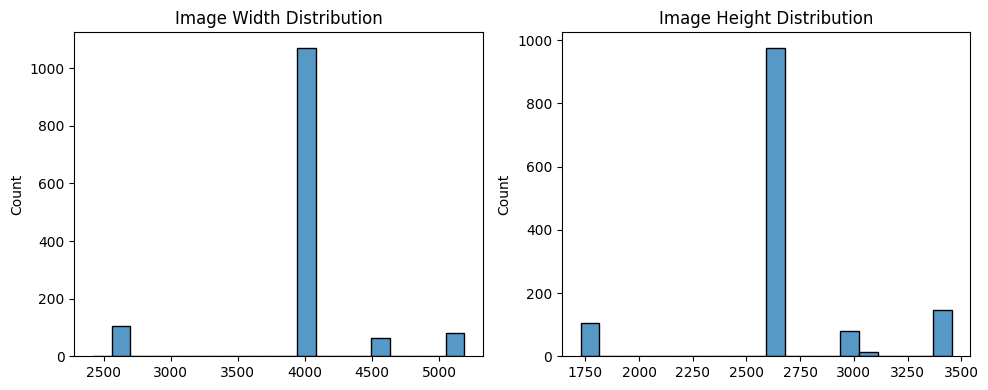

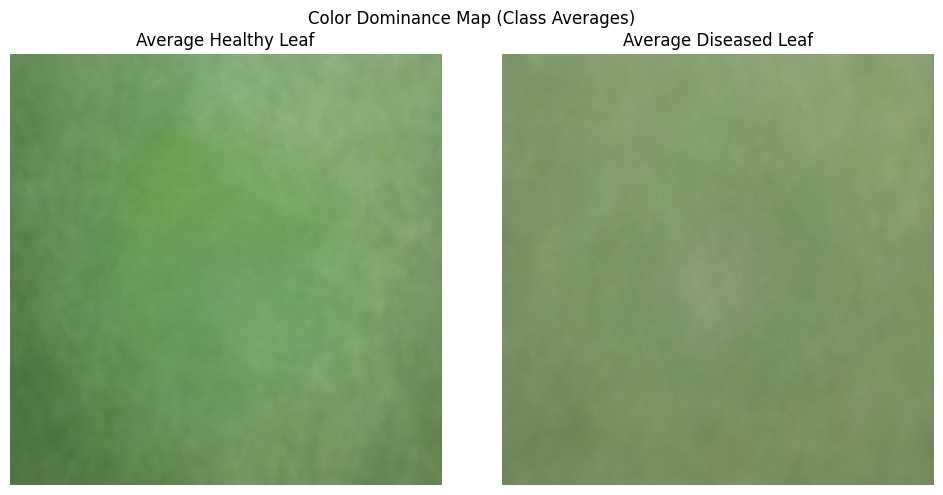

In [13]:
import numpy as np
def compute_average_image(folder_path, image_size=(224, 224), max_images=100):
    sum_image = np.zeros((image_size[0], image_size[1], 3), dtype=np.float64)
    image_files = os.listdir(folder_path)[:max_images]
    count = 0
    for fname in image_files:
        try:
            img = Image.open(os.path.join(folder_path, fname)).resize(image_size).convert('RGB')
            img_array = np.array(img) / 255.0  # Normalize to [0,1]
            sum_image += img_array
            count += 1
        except:
            continue
    return (sum_image / count) if count else None

# Compute average image per class
avg_healthy = compute_average_image(healthy_dir)
avg_powdery = compute_average_image(powdery_dir)
avg_rust = compute_average_image(rust_dir)

# Merge Powdery + Rust to form Diseased average
avg_diseased = (avg_powdery + avg_rust) / 2

# Plot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(avg_healthy)
axs[0].set_title("Average Healthy Leaf")
axs[0].axis('off')

axs[1].imshow(avg_diseased)
axs[1].set_title("Average Diseased Leaf")
axs[1].axis('off')

plt.suptitle("Color Dominance Map (Class Averages)")
plt.tight_layout()
plt.show()
